In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
np.random.seed(0)
#X = np.random.rand(100,2)
X = np.random.multivariate_normal(np.array([10,12]), np.array([[3.5, -1.8], [-1.8,3.5]]), size=(1000))
X

array([[ 7.49725755, 15.24059588],
       [10.47273144, 15.65927145],
       [ 6.05883017, 14.13915846],
       ...,
       [ 9.76808086, 12.41216271],
       [ 7.86455396, 14.42758361],
       [10.65022587,  8.9324642 ]])

In [110]:
X = X - np.mean(X, axis=0)
A = X.T @ X
A

array([[ 3375.19899125, -1696.74638639],
       [-1696.74638639,  3295.2297421 ]])

In [111]:
val, vec = np.linalg.eig(A)
PC = vec[:, np.argmax(val)] #first principal component

X_transformed = np.dot(X, PC)

X_projected = np.outer(X_transformed, PC) #data projected onto principal component

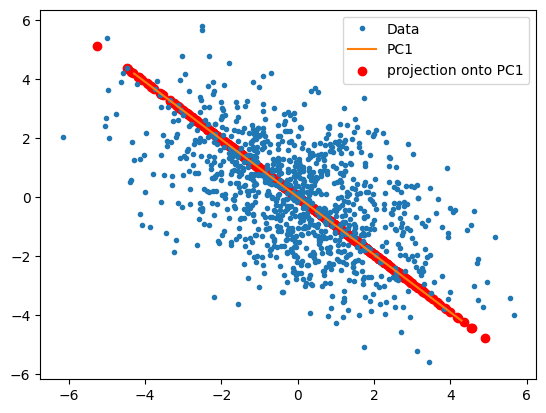

In [133]:
t = np.linspace(-6, 6, 10)
plt.plot(X[:,0], X[:,1], '.', label='Data')
plt.plot(t*PC[0], t*PC[1], label='PC1')
plt.scatter(X_projected[:,0], X_projected[:,1], color='red', label='projection onto PC1')
plt.legend()